# Feed-foward ANN *realmente* paso a paso con NumPy

Eduardo H. Ramirez, PhD [LinkedIn](https://www.linkedin.com/in/ehramirez/)
[Twitter](https://twitter.com/eduhrami)
[Github](https://github.com/tozanni)


# Parte 1. Arquitectura y *forward pass*.

El objetivo de este cuaderno es demostrar las operaciones matemáticas de las redes feed-forward de la forma más clara y directa posible. Espero que puedas leer este cuaderno paso a paso de arriba a abajo, revisando y digiriendo el resultado intermedio de cada operación. Por lo cual he evitado al mínimo posible el uso de librerías, clases y funciones.

He visto muchos ejemplos y artículos donde se escriben redes "from scratch". Por lo general terminan reinventando su propio framework con una buena cantidad de funciones. Al hacer esto volvemos al punto de partida ya que tenemos que que entender la estructura del código, renombrar variables en nuestra mente al entrar a una función, brincar de una función a otra o de una clase a otra. Todo esto va en contra de mi objetivo inicial que es exponer las operaciones de las redes neuronales de forma directa y con el menor número de distracciones.

Por la razón anterior mi objetivo **NO es** escribir un framework, y debido a ello muchas secciones de este cuaderno pueden ser repetitivas y poco flexibles, pero espero que estos inconvenientes se compensen en la claridad.

In [69]:
import numpy as np
from sklearn import datasets
np.random.seed(100)
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

## Dataset

Utilizaremos el dataset Iris, es un dataset tabular con 4 features cuyo objetivo es clasificar flores en familias dadas algunas características de sus pétalos y sépalos.

In [70]:
iris = datasets.load_iris()
X = np.array(iris.data[:200])
Y = np.array(iris.target[:200])

Los atributos de cada registros son la longitud de los sépalos, ancho de los sépalos, longitud de los pétalos y ancho de los pétalos de la flor en centrímetros.

In [71]:
X[0]

array([5.1000, 3.5000, 1.4000, 0.2000])

Las clases Y representan el tipo de flor que deseamos aprender a clasificar siendo 0: Iris-Setosa, 1: Iris-Versicolor y 2: Iris-Virginica.

In [72]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Inputs

A partir de nuestro dataset X, crearemos un minibatch. El minibatch representa la cantidad de renglones del input que nuestra red procesará simultáneamente en tiempo de inferencia o de entrenamiento.

Poder procesar varios inputs simultáneamente es una ventaja adicional de las ANN vs. otros métodos de aprendizaje automático.

En este caso utilizamos un minibatch de tamaño 2, pero este valor puede cambiarse arbitrariamente.

In [73]:
# Leemos las dos primeras instancias del dataset Iris

x = X[:2]
x

array([[5.1000, 3.5000, 1.4000, 0.2000],
       [4.9000, 3.0000, 1.4000, 0.2000]])

In [74]:
x.shape

(2, 4)

## Arquitectura de la red

Vamos a crear una red de perceptrón multicapa o red densa, con 2 capas ocultas, una de 5 unidades y una de 4 unidades. El tamaño de las capas ocultas es una decisión del diseñador de la red, por lo cual queda completamente a nuestro criterio.

Por otro lado, el tamaño de la capa de input depende de la cantidad de features que tienen nuestros dataset, en este caso requerimos 4 unidades. Igualmente la capa de salida depende de la tarea que vamos a resolver, en este caso una clasificación multi-clase. Dado que deseamos clasificar entre tres clases requerimos 3 unidades.

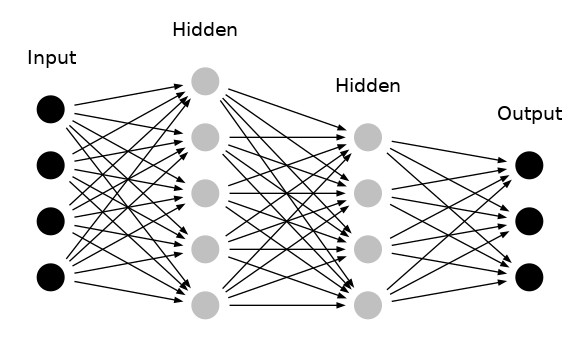

Diagrama generado con [Dotnets + Graphviz](https://github.com/martisak/dotnets)

### Capa oculta 1

El elemento más importante de cada capa oculta es su matriz de pesos.

La matriz de pesos tiene renglones de acuerdo a la cantidad de features del input y tantas columnas como nodos.

Es decir, 4 elementos x 5 nodos de la capa hidden, seran 20 parámetros o pesos para la primera capa.


In [75]:
W_1 = np.random.rand(x.shape[1], 5)
W_1

array([[0.5434, 0.2784, 0.4245, 0.8448, 0.0047],
       [0.1216, 0.6707, 0.8259, 0.1367, 0.5751],
       [0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741]])

In [76]:
W_1.shape

(4, 5)

Aqui multiplicamos el minibatch por la matriz de pesos de la primera capa.

Cada renglón del resultado corresponde con cada elemento del minibatch.

Como ejercicio puedes probar a modificar el tamaño del minibatch y verás cómo se modifica el resultado de esta operación.

In [77]:
h1 = x@W_1
h1

array([[4.6404, 4.2225, 5.3494, 5.1018, 2.3993],
       [4.4710, 3.8315, 4.8515, 4.8645, 2.1108]])

#### Función de activacion de las capas oculas (ReLU)

Aplicamos la funcion ReLU, que simplemente toma el maximo entre cero y el valor obtenido


In [78]:
a1 = np.maximum(h1,0)
a1

array([[4.6404, 4.2225, 5.3494, 5.1018, 2.3993],
       [4.4710, 3.8315, 4.8515, 4.8645, 2.1108]])

In [79]:
a1.shape

(2, 5)

### Capa oculta 2

El input a la capa 2 es el resultado de la activacion de la capa 1, es decir a1.

Para la segunda capa tenemos 5 features, que son las columnas de a<sub>1</sub> x 4 unidades = 20 parámetros.


In [80]:
W_2 = np.random.rand(a1.shape[1], 4 )
W_1

array([[0.5434, 0.2784, 0.4245, 0.8448, 0.0047],
       [0.1216, 0.6707, 0.8259, 0.1367, 0.5751],
       [0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741]])

In [81]:
h2 = a1@W_2
h2

array([[9.8902, 8.1105, 9.3445, 11.7824],
       [9.0444, 7.6898, 8.6400, 10.9484]])

Nuevamente aplicamos la función de activación ReLU, esta operación no modifica las dimensiones del input que estamos procesando en este paso.

In [82]:
# Ojo, la funcion np.max no es element-wise, hay que usar maximum
a2 = np.maximum(h2,0)
a2

array([[9.8902, 8.1105, 9.3445, 11.7824],
       [9.0444, 7.6898, 8.6400, 10.9484]])

### Capa de salida

La capa de salida tiene 3 unidades, una para cada clase del dataset.

La salida de la capa previa a<sub>2</sub> tiene 4 features, entonces la matriz de pesos de la capa de salida tiene 4x3 = 12 parámetros.  

In [83]:
num_output = 3

W_3 = np.random.rand(a2.shape[1], num_output)
W_3

array([[0.7425, 0.6302, 0.5818],
       [0.0204, 0.2100, 0.5447],
       [0.7691, 0.2507, 0.2859],
       [0.8524, 0.9750, 0.8849]])

Calculamos el valor de las neuronas de salida antes de la capa 3.

Esta es equivalente a la capa "Linear" y para algunos problemas es una forma correcta de terminar el output final de la red.

In [84]:
h3 = a2@W_3
h3

array([[24.7393, 21.7666, 23.2694],
       [22.8500, 20.1555, 21.6088]])

A continuación puedes ver la operación anterior expresada de forma compacta como una *composición de funciones*, que es una multiplicación sucesiva del input por sus pesos con una función no-lineal entre cada una de las operaciones. Como puedes ver, las variables h<sub>1</sub>, h<sub>2</sub> y a<sub>1</sub>, a<sub>2</sub> no son realmente necesarias para la implementación, sino que se agregan con fines didácticos.

In [85]:
np.maximum(np.maximum(x@W_1,0)@W_2,0)@W_3

array([[24.7393, 21.7666, 23.2694],
       [22.8500, 20.1555, 21.6088]])

#### Función de activación de la última capa (Softmax)

En este caso, ya que deseamos implementar una red neuronal para clasificación multi-clase, calcularemos la función softmax. Recordemos que la activación de la última capa está determinada por la tarea que vamos a resolver en la red.

Entonces, el resultado de la función softmax representará la probabilidad de que nuestro input (x<sub>i</sub>) pertenezca a cada una de las clases del dataset Iris.  Cada clase está representada por una columna y corresponde a las unidades de la capa de salida de la red.


A continuación ejecutamos la función softmax que será el resultado final de nuestro "forward pass" de la red. Dado que nuestro minibatch es de tamaño 2, cada renglón del output es una clasificación completa realizada por la red.

Recuerda que estos resultados son completamente aleatorios, en este momento únicamente nos interesa validar que nuestra red tenga la arquitectura y dimensiones correctas.


In [86]:
output = np.exp(h3)/(np.sum(np.exp(h3), axis = 1)).reshape(-1,1)
output

array([[0.7806, 0.0399, 0.1795],
       [0.7371, 0.0498, 0.2131]])

A continuación podemos verificar que la suma de cada renglon es 1.

In [87]:
np.sum(output, axis=1).reshape(-1,1)

array([[1.0000],
       [1.0000]])

**Nota:** Numéricamente, la función softmax es propensa a *overflow* o *underflow*. Para evitar este problema, se utiliza una "truco" para hacerla [numéricamente estable](https://stackoverflow.com/questions/42599498/numerically-stable-softmax) que consiste en restar a cada renglón el valor máximo antes de realizar las operaciones de exponenciación en el numerador y el denominador. A continuacion puedes ver cómo se implementa Softmax con ajuste para overflow, pero por simplicidad omitiremos este paso en el resto del tutorial.

In [88]:
# Primero calculamos el maximo de cada renglon
maxes= np.max(h3,1).reshape(-1,1)
output = np.exp(h3 - maxes)/(np.sum(np.exp(h3 - maxes), axis = 1)).reshape(-1,1)
output

array([[0.7806, 0.0399, 0.1795],
       [0.7371, 0.0498, 0.2131]])

## Resumen del forward pass

Finalmente podemos expresar **todo** el forward pass de la red de la siguiente forma en las siguientes 2 líneas. Toma nota de ellas, ya que en los siguientes pasos utilizaremos esta notación compacta. Dejo comentadas las inicializaciones de los parámetros para que puedas comprobar el resultado anterior.

In [90]:
#Obtener datos
#x = X[:2]

#Inicializar arreglos de parametros con valores aleatorios
#W_1 = np.random.rand(x.shape[1], 5)
#W_2 = np.random.rand(a1.shape[1], 4 )
#W_3 = np.random.rand(a2.shape[1], 3)

# Forward pass, ejecutamos las 2 capas ocultas ReLU y la capa de salida lineal
h3 = np.maximum(np.maximum(x@W_1,0)@W_2,0)@W_3

# Función de activación softmax para la última capa
output = np.exp(h3)/(np.sum(np.exp(h3), axis = 1)).reshape(-1,1)
output

array([[0.7806, 0.0399, 0.1795],
       [0.7371, 0.0498, 0.2131]])